In [ ]:
# dataset :https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\user\\Downloads\\bigmart sales.csv")
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [2]:
df.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

In [3]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

# Line chart

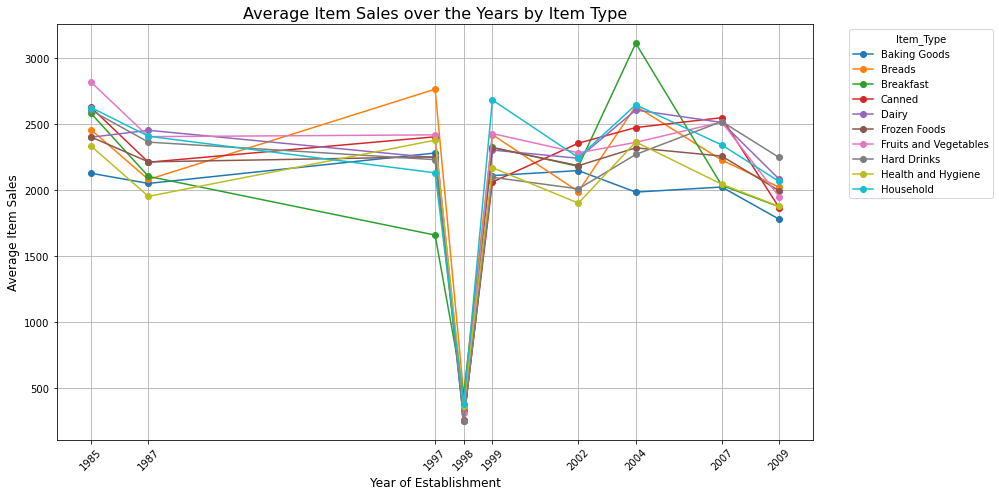

In [4]:
# Function to create an improved multiple line chart with a different grouping
def plot_improved_line_chart_by_item_type(data, x_column, y_column, groupby_column, title, x_label, y_label):
    """
    Creates an improved multiple line chart grouped by 'Item_Type' instead of 'Outlet_Size'.

    :param data: Pandas DataFrame containing the data.
    :param x_column: The column name for the x-axis.
    :param y_column: The column name for the y-axis.
    :param groupby_column: The column name to group and create multiple lines.
    :param title: The title of the chart.
    :param x_label: The label for the x-axis.
    :param y_label: The label for the y-axis.
    """
    # Group the data by the 'groupby_column' and 'x_column' and calculate the mean of 'y_column'
    grouped_data = data.groupby([groupby_column, x_column])[y_column].mean().unstack(groupby_column)
    
    # Set the color palette
    colors = plt.get_cmap('tab10')

    # Start plotting with a larger figure size for better readability
    plt.figure(figsize=(14, 7))
    for (column, color) in zip(grouped_data.columns, colors.colors):
        plt.plot(grouped_data.index, grouped_data[column], marker='o', color=color, label=column)
    
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(title=groupby_column, bbox_to_anchor=(1.04,1), loc="upper left")
    plt.grid(True)
    plt.xticks(grouped_data.index, rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()

# Let's use the improved function with the bigmart sales data, now grouping by 'Item_Type'.
plot_improved_line_chart_by_item_type(df,
                                      x_column='Outlet_Establishment_Year',
                                      y_column='Item_Outlet_Sales',
                                      groupby_column='Item_Type',
                                      title='Average Item Sales over the Years by Item Type',
                                      x_label='Year of Establishment',
                                      y_label='Average Item Sales')


# Histogram

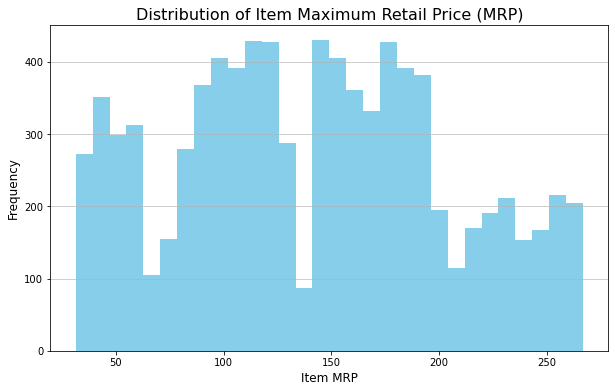

In [5]:
# Function to create a histogram
def plot_histogram(data, column, title, x_label, y_label, bins=None, color=None):
    """
    Creates a histogram for a given numerical column in the data.

    :param data: Pandas DataFrame containing the data.
    :param column: The column name for which the histogram will be created.
    :param title: The title of the histogram.
    :param x_label: The label for the x-axis.
    :param y_label: The label for the y-axis.
    :param bins: The number of bins for the histogram. Optional; the default is calculated automatically.
    :param color: The color for the histogram bars. Optional; a default color palette is used if not provided.
    """
    # Let's plot and find out the distribution of our column of interest.
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=bins, color=color)
    
    # Setting up titles and labels. A histogram without labels is like a shop with no signboard!
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # And of course, the grid for better readability.
    plt.grid(axis='y', alpha=0.75)
    
    # Now, let the histogram speak for itself!
    plt.show()

# Now we'll use the histogram function to visualize the distribution of the Item Maximum Retail Price (MRP).
plot_histogram(df,
               column='Item_MRP',
               title='Distribution of Item Maximum Retail Price (MRP)',
               x_label='Item MRP',
               y_label='Frequency',
               bins=30,  # Let's go for 30 bins.
               color='skyblue')  # A soothing sky blue color for our bars.


# pie chart

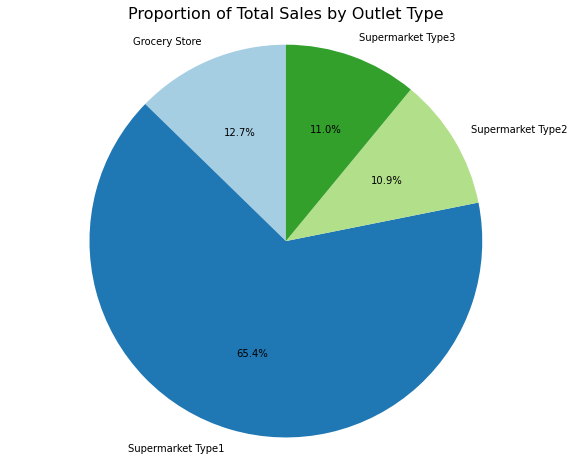

In [7]:
# Function to create a pie chart
def plot_pie_chart(data, column, title):
    """
    Creates a pie chart for a given categorical column in the data.

    :param data: Pandas DataFrame containing the data.
    :param column: The column name for which the pie chart will be created.
    :param title: The title of the pie chart.
    """
    # First, let's sum up the total sales by the category of interest.
    sales_by_category = data.groupby(column).size()
    
    # Time to plot! Let's bring out the pie (chart), shall we?
    fig, ax = plt.subplots(figsize= (10,8))
    ax.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # And what's a pie without a title? Let's add one.
    plt.title(title, fontsize=16)
    
    # Serve the pie chart hot!
    plt.show()

# Now, let's use the pie chart function to visualize the sales distribution by 'Outlet_Type'.
plot_pie_chart(df,
               column='Outlet_Type',
               title='Proportion of Total Sales by Outlet Type')
